In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

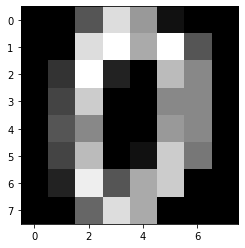

In [11]:
digits = datasets.load_digits()
image = digits.data[0].reshape(8, 8)
plt.imshow(image, cmap="gray")
plt.show()

In [12]:
def im2col(img, flt_h, flt_w, out_h, out_w, stride):
    # n_bt, n_ch, img_h, img_w = images.shape
    # out_h = (img_h - flt_h + 2*pad) // stride + 1
    # out_w = (img_w - flt_w + 2*pad) // stride + 1
    # img_pad = np.pad(images, [(0,0), (0,0), (pad,pad), (pad,pad)], "constant") 
    cols = np.zeros((flt_h*flt_w, out_h*out_w))
    for h in range(out_h):
        h_lim = stride*h + flt_h
        for w in range(out_w):
            w_lim = stride*w + flt_w
            cols[:, h*out_w+w] = img[stride*h:h_lim, stride*w:w_lim].reshape(-1)
    
    return cols

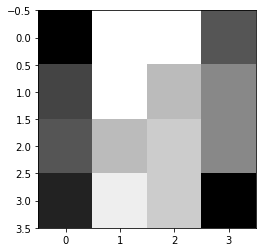

In [13]:
img_h, img_w = image.shape
pool = 2

out_h = img_h//pool
out_w = img_w//pool

cols = im2col(image, pool, pool, out_h, out_w, pool)
image_out = np.max(cols, axis=0)
image_out = image_out.reshape(out_h, out_w)

plt.imshow(image_out, cmap="gray")
plt.show()